Enter the x  start coordinate for the tool:
2
Enter the x  finish coordinate for the tool:
0
Enter the y start coordinate for the tool:
0
Enter the y finish coordinate for the tool:
2
Enter the x velocity for the tool:
1
Enter the y velocity for the tool:
1


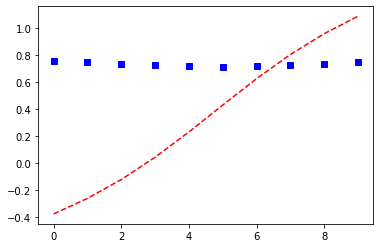

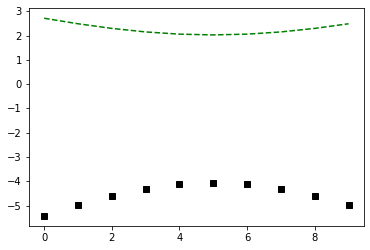

In [26]:
import math
import numpy
import matplotlib.pyplot as plt

a1 = 1
a2 = 1

print("Enter the x  start coordinate for the tool:")
xs = input()
print("Enter the x  finish coordinate for the tool:")
xf = input()
print("Enter the y start coordinate for the tool:")
ys = input()
print("Enter the y finish coordinate for the tool:")
yf = input()
print("Enter the x velocity for the tool:")
xv = input()
print("Enter the y velocity for the tool:")
yv = input()

### Going to do 10 steps

mystep = 10
stepx = (float(xf) - float(xs)) / mystep
stepy = (float(yf) - float(ys)) / mystep

### arrays to hold the data

t1table = numpy.zeros(10)
t2table = numpy.zeros(10)
jv1table = numpy.zeros(10)
jv2table = numpy.zeros(10)




for i in range(mystep):
    
    D = (float(xs) ** 2 + float(ys) ** 2 + a1 ** 2 + a2 **2) / (2 * a1 * a2)
    if D == 0:
        D = 2 * math.pi
    theta2 = math.atan((math.sqrt(abs(1 - D ** 2)))/(D))
    theta1 = math.atan(float(ys)/float(xs)) - math.atan((a2 * math.sin(theta2))/(a1 + a2 * math.cos(theta2)))
    J_header = 1 / (a1 * a2 * math.sin(theta2))
    J_inv = numpy.array([[a2 * math.cos(theta1 + theta2), a2 * math.sin(theta1 + theta2)],[ -1 * a1 * math.cos(theta1) - a2 * math.cos(theta1 + theta2), -1 * a1 *math.sin(theta1) - a2 * math.sin(theta1 + theta2)]])
    z = numpy.array([[xs], [ys]], numpy.float)
    J_inv = J_header * J_inv
    ans = numpy.matmul(J_inv, z)
    
    t1table[i] = theta1
    t2table[i] = theta2
    jv1table[i] = ans[0,0]
    jv2table[i] = ans[1,0]
    
    
    xs = float(xs) + stepx
    ys = float(ys) + stepy

    
    
  
fig, ax = plt.subplots()  
ax.plot(t1table,  'r--', t2table, 'bs')


fig, ay = plt.subplots()  
ay.plot(jv1table,  'g--', jv2table, 'ks')
